<a href="https://colab.research.google.com/github/CarlosZuluagaU/KaggleUdeACarlosZuluaga/blob/main/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyect

In [ ]:
!pip install rlxutils


  Preparing metadata (setup.py) ... done
  Created wheel for rlxutils: filename=rlxutils-0.1.10-py3-none-any.whl size=11100 sha256=d199070c21d172d26070827a922f0c882cbdd0358f87a6a2a33e3ff65d261661
  Stored in directory: /root/.cache/pip/wheels/fa/8f/e3/7c998c7a46a028383fd3c53494f18d81d52b7368c6b33e4ab6
Successfully built rlxutils


In [2]:
!pip install kaggle
import os

os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia
!unzip udea*.zip -d data



  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 950MB/s]
Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: data/submission_example.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [77]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia


udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
!pip install -q kaggle
import os

# Configura la ruta del token
os.environ['KAGGLE_CONFIG_DIR'] = '.'

# Permisos de seguridad para el archivo
!chmod 600 ./kaggle.json

# Descarga el dataset del concurso
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia


udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print(train.shape)
train.head()


(692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [22]:
train.columns.tolist()


['ID',
 'PERIODO_ACADEMICO',
 'E_PRGM_ACADEMICO',
 'E_PRGM_DEPARTAMENTO',
 'E_VALORMATRICULAUNIVERSIDAD',
 'E_HORASSEMANATRABAJA',
 'F_ESTRATOVIVIENDA',
 'F_TIENEINTERNET',
 'F_EDUCACIONPADRE',
 'F_TIENELAVADORA',
 'F_TIENEAUTOMOVIL',
 'E_PRIVADO_LIBERTAD',
 'E_PAGOMATRICULAPROPIO',
 'F_TIENECOMPUTADOR',
 'F_TIENEINTERNET.1',
 'F_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL',
 'INDICADOR_1',
 'INDICADOR_2',
 'INDICADOR_3',
 'INDICADOR_4']

In [24]:
cols = [
    'F_ESTRATOVIVIENDA',
    'E_VALORMATRICULAUNIVERSIDAD',
    'F_EDUCACIONPADRE',
    'F_EDUCACIONMADRE',
    'F_TIENEINTERNET',
    'RENDIMIENTO_GLOBAL'
]

data = train[cols].copy()
data.head()



,F_ESTRATOVIVIENDA,E_VALORMATRICULAUNIVERSIDAD,F_EDUCACIONPADRE,F_EDUCACIONMADRE,F_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Estrato 3,Entre 5.5 millones y menos de 7 millones,Técnica o tecnológica incompleta,Postgrado,Si,medio-alto
1,Estrato 3,Entre 2.5 millones y menos de 4 millones,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,Estrato 3,Entre 2.5 millones y menos de 4 millones,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,bajo
3,Estrato 4,Entre 4 millones y menos de 5.5 millones,No sabe,Secundaria (Bachillerato) completa,Si,alto
4,Estrato 3,Entre 2.5 millones y menos de 4 millones,Primaria completa,Primaria completa,Si,medio-bajo


In [80]:
cols = [
    'F_ESTRATOVIVIENDA',
    'E_VALORMATRICULAUNIVERSIDAD',
    'F_EDUCACIONPADRE',
    'F_EDUCACIONMADRE',
    'F_TIENEINTERNET',
    'RENDIMIENTO_GLOBAL'
]

data = train[cols].copy()
data.head()




,F_ESTRATOVIVIENDA,E_VALORMATRICULAUNIVERSIDAD,F_EDUCACIONPADRE,F_EDUCACIONMADRE,F_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,Estrato 3,Entre 5.5 millones y menos de 7 millones,Técnica o tecnológica incompleta,Postgrado,Si,medio-alto
1,Estrato 3,Entre 2.5 millones y menos de 4 millones,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,Estrato 3,Entre 2.5 millones y menos de 4 millones,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,bajo
3,Estrato 4,Entre 4 millones y menos de 5.5 millones,No sabe,Secundaria (Bachillerato) completa,Si,alto
4,Estrato 3,Entre 2.5 millones y menos de 4 millones,Primaria completa,Primaria completa,Si,medio-bajo


In [27]:
data.columns.tolist()


['F_ESTRATOVIVIENDA',
 'E_VALORMATRICULAUNIVERSIDAD',
 'F_EDUCACIONPADRE',
 'F_EDUCACIONMADRE',
 'F_TIENEINTERNET',
 'RENDIMIENTO_GLOBAL']

In [28]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='RENDIMIENTO_GLOBAL')
y = data['RENDIMIENTO_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((554000, 5), (138500, 5))

In [31]:
# Rellenar valores faltantes
data['E_VALORMATRICULAUNIVERSIDAD'] = data['E_VALORMATRICULAUNIVERSIDAD'].fillna('no info')

# Aplicar mapeo
data['E_VALORMATRICULAUNIVERSIDAD'] = data['E_VALORMATRICULAUNIVERSIDAD'].map(mapa_valor)

# Verifica
data['E_VALORMATRICULAUNIVERSIDAD'].value_counts()



,count
E_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


In [33]:
# Convertir la variable E_VALORMATRICULAUNIVERSIDAD a categorías numéricas
data['E_VALORMATRICULAUNIVERSIDAD'] = data['E_VALORMATRICULAUNIVERSIDAD'].astype('category').cat.codes


In [34]:
target_map = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}
data['RENDIMIENTO_GLOBAL'] = data['RENDIMIENTO_GLOBAL'].map(target_map)


In [35]:
from sklearn.model_selection import train_test_split

X = data.drop('RENDIMIENTO_GLOBAL', axis=1)
y = data['RENDIMIENTO_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
data.shape
data['RENDIMIENTO_GLOBAL'].isna().sum()


np.int64(0)

In [38]:
pd.crosstab(train['F_EDUCACIONPADRE'], train['F_EDUCACIONMADRE'])



F_EDUCACIONMADRE,Educación profesional completa,Educación profesional incompleta,Ninguno,No Aplica,No sabe,Postgrado,Primaria completa,Primaria incompleta,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Técnica o tecnológica incompleta
F_EDUCACIONPADRE,,,,,,,,,,,,
Educación profesional completa,33303,5322,288,191,335,9212,1316,1749,11369,3679,13496,2655
Educación profesional incompleta,5233,4476,284,91,124,2314,839,1148,4328,2123,4638,1316
Ninguno,412,149,7947,63,59,175,1842,6270,2010,1791,691,452
No Aplica,1079,291,157,567,58,680,626,1194,1744,981,1421,406
No sabe,2244,601,148,63,1086,1228,1041,1827,3164,1882,2548,723
Postgrado,11427,2100,58,101,168,18492,331,400,3736,1024,5151,1111
Primaria completa,1808,565,751,79,138,935,19525,8232,10899,7400,3993,1493
Primaria incompleta,3023,947,3181,199,245,1573,13740,59337,17235,16662,6537,2710
Secundaria (Bachillerato) completa,11835,3050,584,229,295,4956,7449,7727,53902,14426,17727,5873


[Errno 2] No such file or directory: 'my_submission.csv'


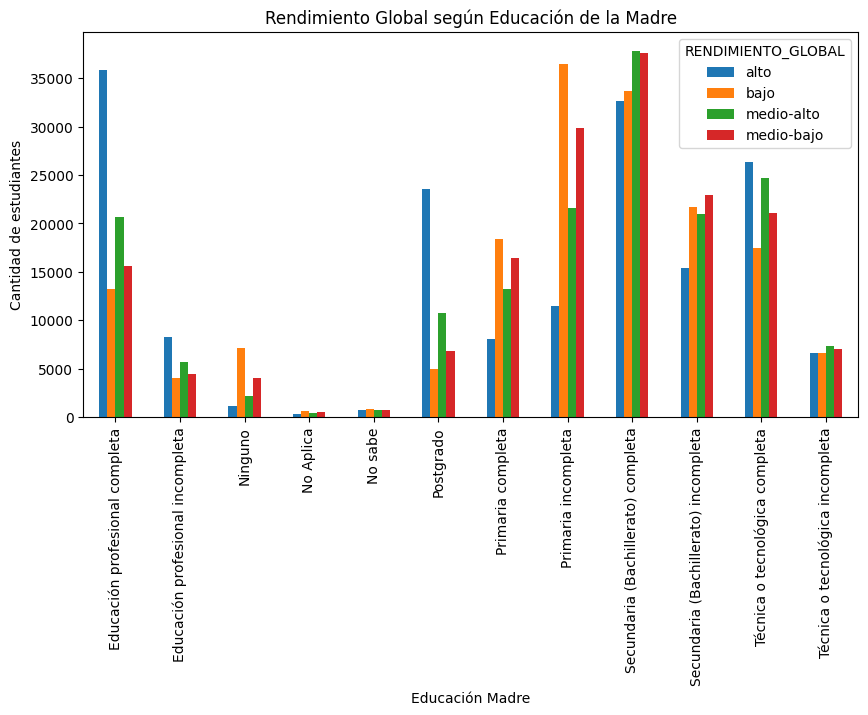

In [ ]:
pd.crosstab(train['FAMI_EDUCACIONMADRE'], train['RENDIMIENTO_GLOBAL']).plot(kind='bar', figsize=(10,5))
plt.title('Rendimiento Global según Educación de la Madre')
plt.xlabel('Educación Madre')
plt.ylabel('Cantidad de estudiantes')
plt.show()


In [39]:
data.filter(like='FAMI_EDUCACIONMADRE_').sum().sort_values(ascending=False)


,0


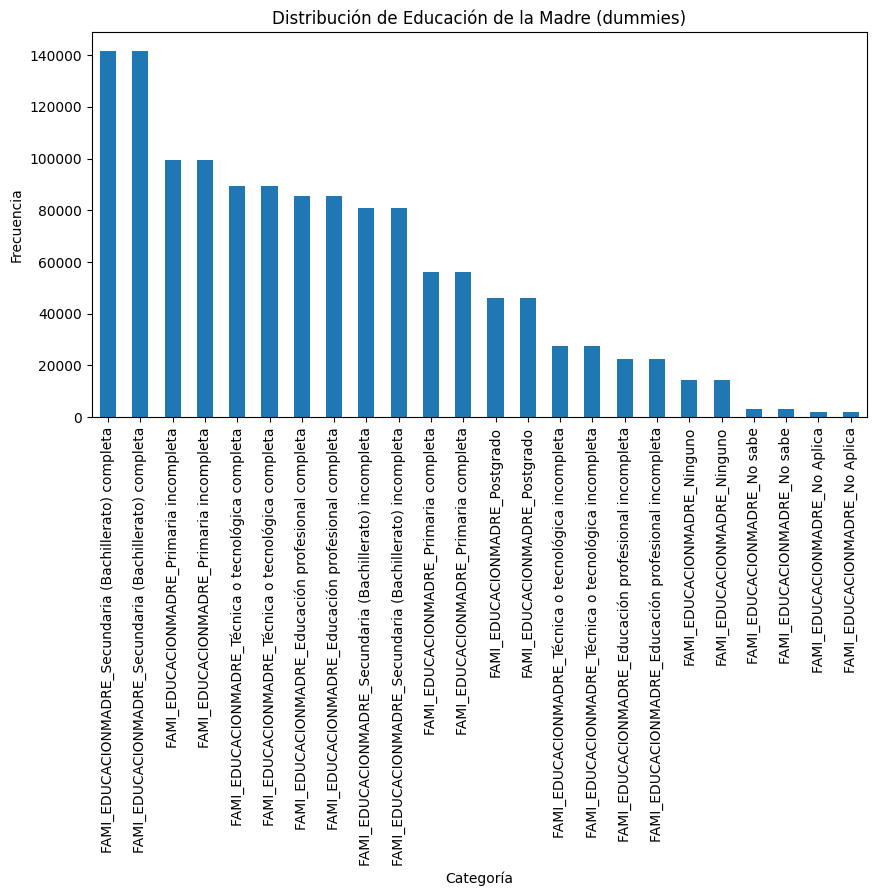

In [42]:
# Crear dummies de F_EDUCACIONMADRE
dummies_madre = pd.get_dummies(data['F_EDUCACIONMADRE'], prefix='FAMI_EDUCACIONMADRE')

# Agregar al DataFrame (opcional)
data = pd.concat([data, dummies_madre], axis=1)

# Graficar
data.filter(like='FAMI_EDUCACIONMADRE_').sum().sort_values(ascending=False).plot(
    kind='bar', figsize=(10,5)
)
plt.title('Distribución de Educación de la Madre (dummies)')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()


In [45]:
from rlxutils import subplots
import matplotlib.pyplot as plt

col = 'FAMI_ESTRATOVIVIENDA'

# Asegurarse de que la columna existe y no tenga muchos NaN
if col in train.columns:
    categorias = sorted(train[col].dropna().unique())

    for ax, cat in subplots(categorias, n_cols=4, usizex=4):
        subset = train[train[col] == cat]

        # Reindexa para mantener orden fijo de las categorías de rendimiento
        valores = subset['RENDIMIENTO_GLOBAL'].value_counts()
        valores.plot(kind='bar', ax=ax)

        ax.set_title(f"{col}: {cat}")
        ax.set_xlabel("")
        ax.set_ylabel("Cantidad")
else:
    print(f"La columna {col} no existe en el DataFrame.")


La columna FAMI_ESTRATOVIVIENDA no existe en el DataFrame.


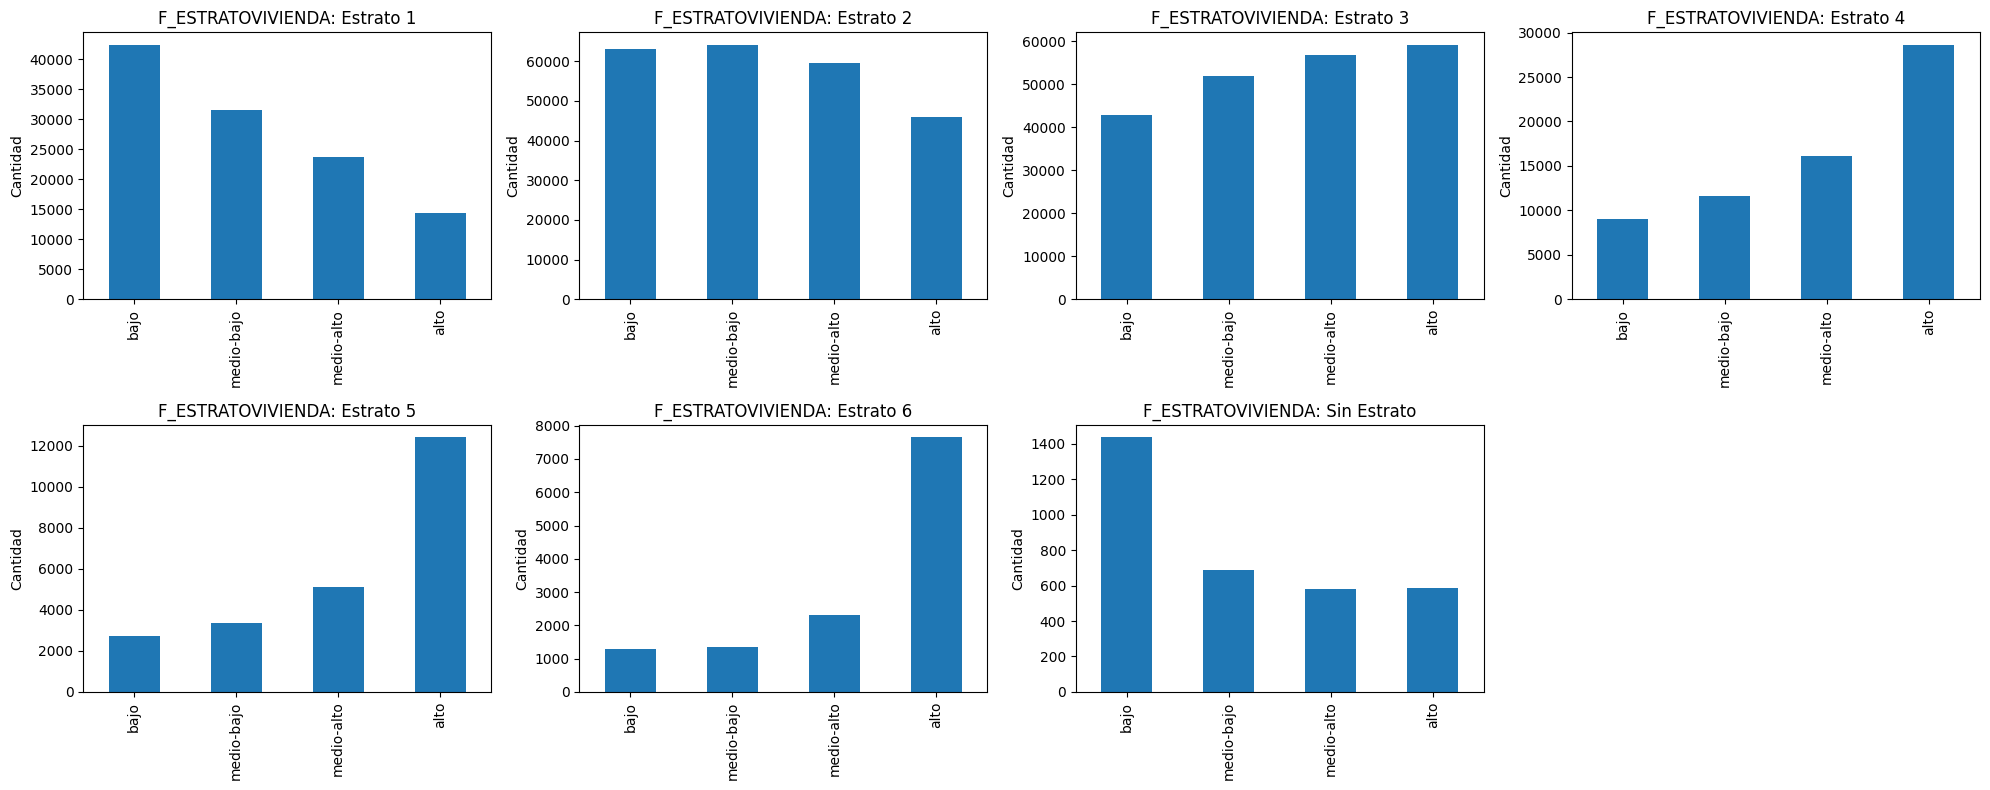

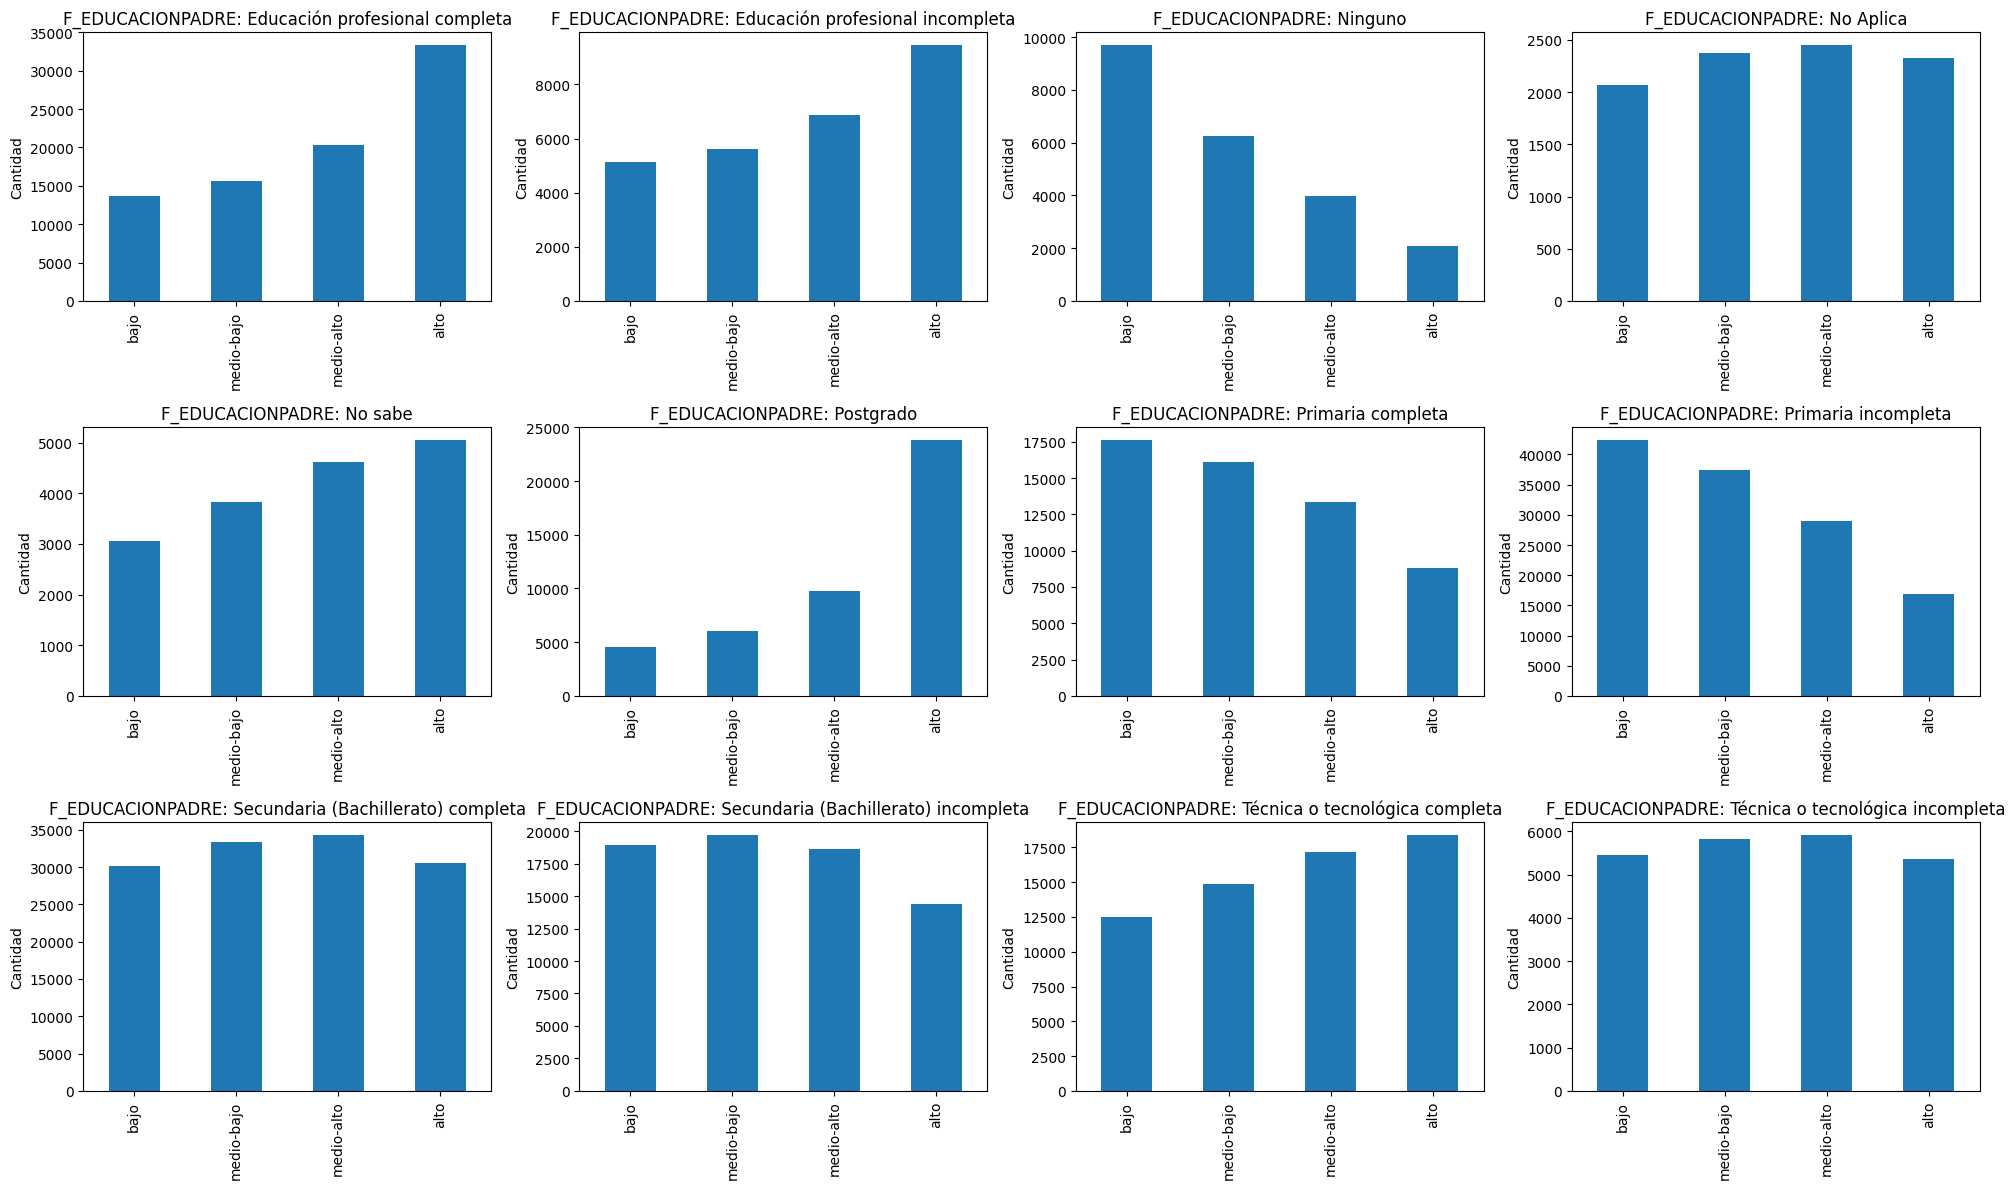

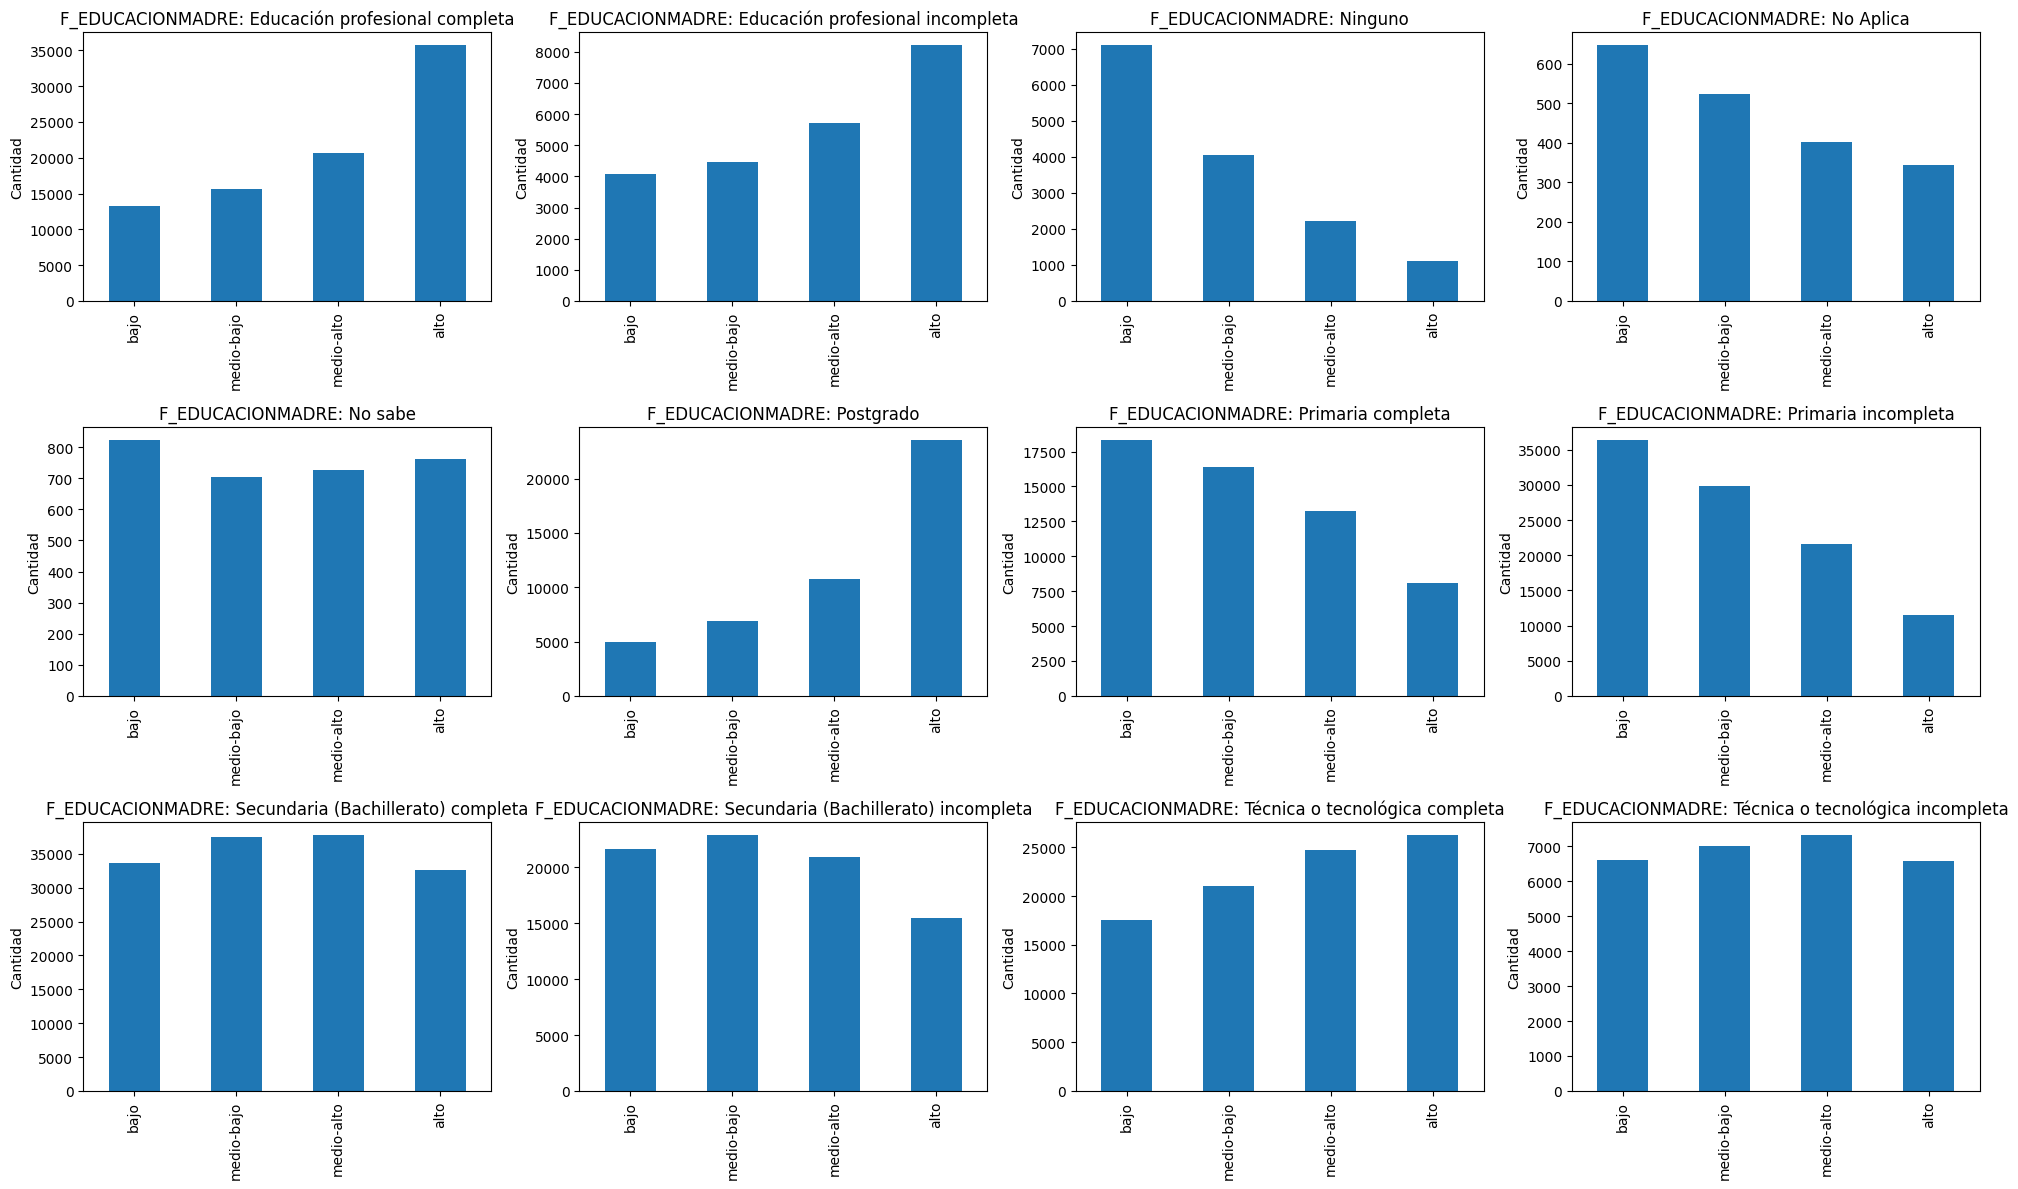

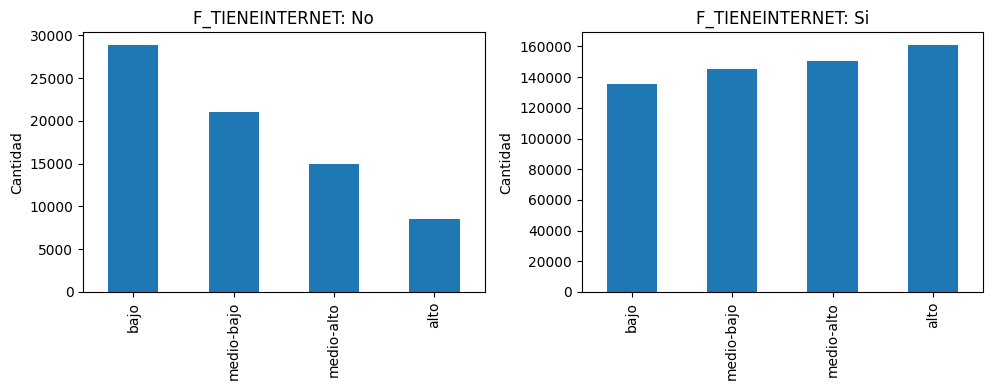

In [47]:
import matplotlib.pyplot as plt
import math

cols = ['F_ESTRATOVIVIENDA', 'F_EDUCACIONPADRE', 'F_EDUCACIONMADRE', 'F_TIENEINTERNET']

for col in cols:
    categorias = sorted(train[col].dropna().unique())
    n_rows = math.ceil(len(categorias) / 4)
    fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 4 * n_rows))
    axes = axes.flatten()

    for ax, cat in zip(axes, categorias):
        subset = train[train[col] == cat]
        subset['RENDIMIENTO_GLOBAL'].value_counts().reindex(
            ['bajo', 'medio-bajo', 'medio-alto', 'alto']
        ).plot(kind='bar', ax=ax)
        ax.set_title(f"{col}: {cat}")
        ax.set_xlabel("")
        ax.set_ylabel("Cantidad")

    # Ocultar ejes vacíos
    for ax in axes[len(categorias):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()


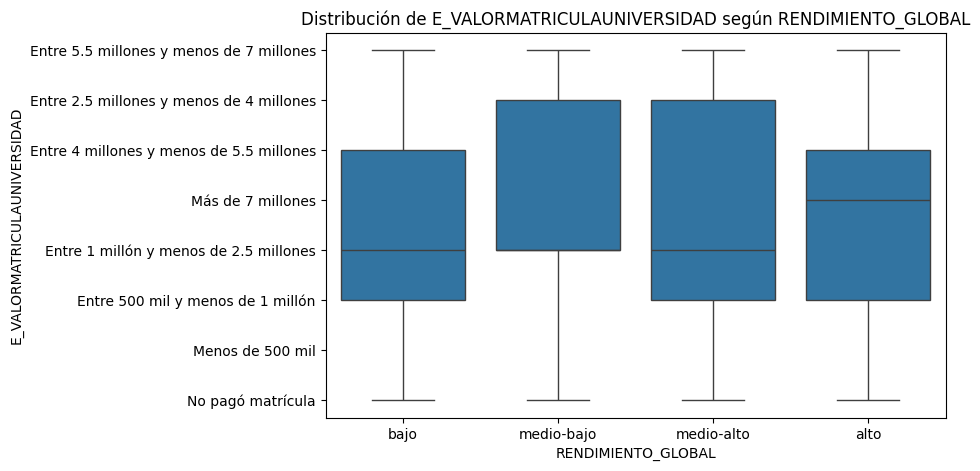

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['E_VALORMATRICULAUNIVERSIDAD']

for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=train,
        x='RENDIMIENTO_GLOBAL',
        y=col,
        order=['bajo', 'medio-bajo', 'medio-alto', 'alto']
    )
    plt.title(f'Distribución de {col} según RENDIMIENTO_GLOBAL')
    plt.show()


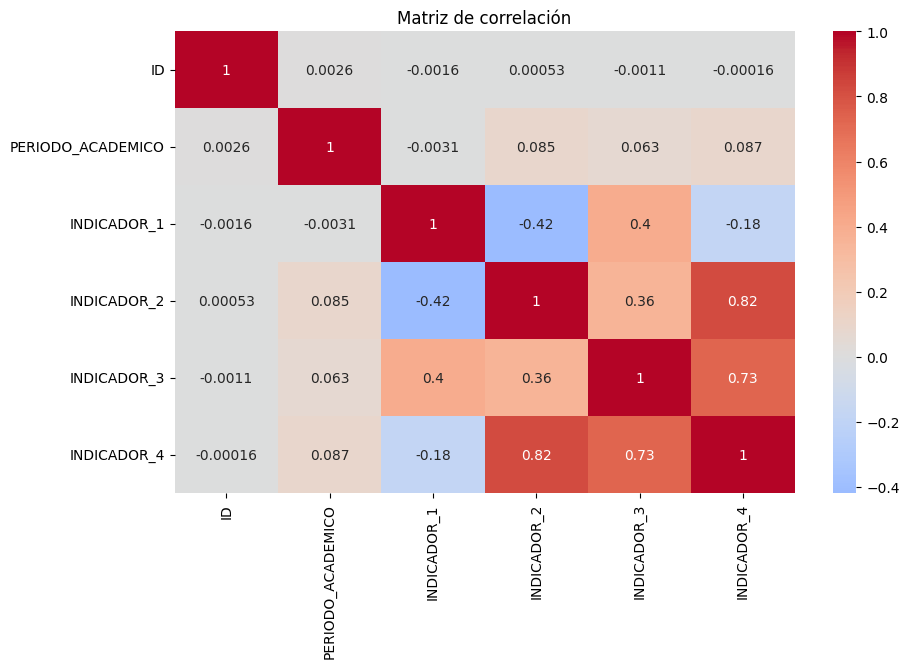

In [49]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación")
plt.show()


In [50]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='RENDIMIENTO_GLOBAL')
y = data['RENDIMIENTO_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Creamos un mapa manual
mapeo_matricula = {
    'Menos de 1 millón': 0.5,
    'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    '7 millones o más': 7.5
}

# Reemplazar texto por valores numéricos
data['E_VALORMATRICULAUNIVERSIDAD'] = data['E_VALORMATRICULAUNIVERSIDAD'].map(mapeo_matricula)



In [55]:
data['E_VALORMATRICULAUNIVERSIDAD'].head()



,E_VALORMATRICULAUNIVERSIDAD
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [62]:
# En lugar de:
# data['E_VALORMATRICULAUNIVERSIDAD'].fillna(mediana_matricula, inplace=True)

# Usa esto:
data['E_VALORMATRICULAUNIVERSIDAD'] = data['E_VALORMATRICULAUNIVERSIDAD'].fillna(mediana_matricula)

In [64]:
# Esta también funciona y es segura:
data.fillna({'E_VALORMATRICULAUNIVERSIDAD': mediana_matricula}, inplace=True)

In [67]:
data['E_VALORMATRICULAUNIVERSIDAD'].head()

,E_VALORMATRICULAUNIVERSIDAD
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [68]:
data = data.dropna(subset=['RENDIMIENTO_GLOBAL'])


In [69]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='RENDIMIENTO_GLOBAL')
y = data['RENDIMIENTO_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [71]:
# ANTES de hacer el model.fit
# Asumiendo que 'X_train' es un DataFrame de pandas

# Identifica todas las columnas que son de tipo 'object' (texto)
columnas_de_texto = X_train.select_dtypes(include=['object']).columns

# Aplica One-Hot Encoding
X_train = pd.get_dummies(X_train, columns=columnas_de_texto)

# ¡IMPORTANTE! Debes aplicar la misma transformación a X_test
# (Usaremos .reindex para asegurar que tengan las mismas columnas)
X_test = pd.get_dummies(X_test, columns=columnas_de_texto)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Ahora sí, puedes entrenar el modelo
model = DecisionTreeClassifier(max_depth=8, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

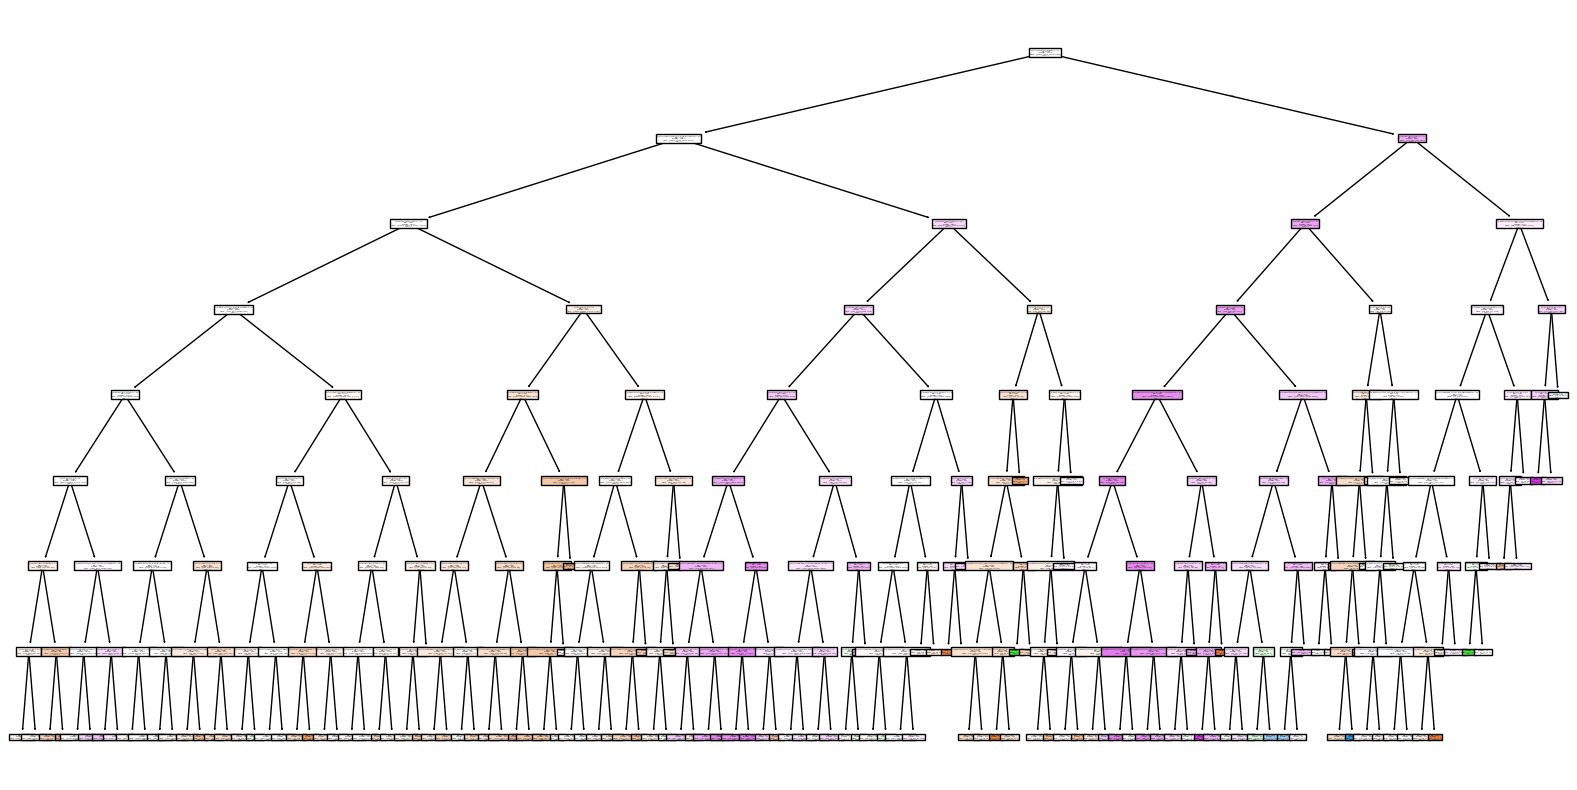

In [78]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

# Convierte las clases (que son números, ej: [0, 1]) a strings (ej: ['0', '1'])
class_names_str = model.classes_.astype(str)

tree.plot_tree(model,
                filled=True,
                feature_names=X_train.columns,
                class_names=class_names_str)  # <-- Usamos la versión en string

plt.show()

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Precisión: 0.3467942238267148

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.36      0.48      0.41     34573
           1       0.29      0.05      0.09     34503
           2       0.27      0.46      0.34     34259
           3       0.48      0.39      0.43     35165

    accuracy                           0.35    138500
   macro avg       0.35      0.35      0.32    138500
weighted avg       0.35      0.35      0.32    138500


Matriz de confusión:
 [[16601  1835 12746  3391]
 [12958  1839 15104  4602]
 [ 9894  1576 15895  6894]
 [ 6093  1056 14320 13696]]
